<a href="https://colab.research.google.com/github/nelson0216/mid_term/blob/main/midterm_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/csv資料夾/train.xlsx")
test = pd.read_excel("/content/drive/MyDrive/csv資料夾/test.xlsx")

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

In [ ]:
feature_sel1 = data.iloc[:,7:-1].values
y = data.iloc[:,-1]
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(feature_sel1)
feature_sel1 = imputer.transform(feature_sel1)
new_fea = pd.DataFrame(feature_sel1)

In [ ]:
new_fea.iloc[:,59]
rer = data.iloc[:,-1]
rer

0       0
1       0
2       0
3       0
4       0
       ..
8278    0
8279    0
8280    0
8281    0
8282    0
Name: 崩塌, Length: 8283, dtype: int64

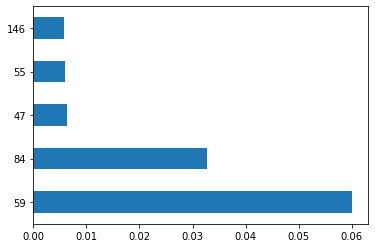

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(new_fea,y)
feat_importances = pd.Series(model.feature_importances_, index=new_fea.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
df1 = data.iloc[:,0:7]
df2 = test.iloc[:,0:7]
temp = pd.concat([df1, new_fea.iloc[:, [59, 84]]], axis=1)

In [ ]:
temp1 = temp.values
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = imputer1.fit(temp1)
temp2 = imputer1.transform(temp1)
new_fea1 = pd.DataFrame(temp2)
new_fea1

,0,1,2,3,4,5,6,7,8
0,138.191345,1655.064087,93.277863,-6.547695,1646.903926,14860.0,0.000000,0.279070,5543.061965
1,142.642822,964.542664,75.186897,-9.476837,2.255308,7554.0,0.000000,0.196970,340.452947
2,221.524994,727.082153,86.510719,-7.463625,0.000000,3667.0,0.000000,0.000000,251.963837
3,204.749802,561.975586,32.229729,-6.683244,35.296943,3562.0,0.000000,0.098765,1925.350618
4,293.591034,2620.492432,164.807343,-10.701438,0.000000,35760.0,0.000000,0.030151,936.292677
...,...,...,...,...,...,...,...,...,...
8278,13.206665,2549.108154,93.549110,-7.327434,1.637638,39910.0,0.000000,0.011696,4091.354411
8279,338.989319,1791.204346,89.830032,-6.636634,0.000000,37750.0,0.000000,0.776882,0.000000
8280,172.689148,1053.547974,52.571163,-4.250000,546.010234,1681.0,0.000000,0.000000,1819.634682
8281,217.424911,1202.891602,73.653458,-9.562500,0.000000,11820.0,0.000000,0.086869,4155.227173


In [ ]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaler = StandardScaler().fit(new_fea1)
new_fea1 = scaler.transform(new_fea1)
# summarize transformed data
set_printoptions(precision=3)
new_fea1

array([[-0.09 ,  0.334, -0.04 , ..., -0.09 ,  0.105,  0.478],
       [-0.09 , -0.626, -0.453, ..., -0.09 , -0.17 , -1.155],
       [-0.089, -0.956, -0.195, ..., -0.09 , -0.829, -1.183],
       ...,
       [-0.089, -0.502, -0.968, ..., -0.09 , -0.829, -0.691],
       [-0.089, -0.295, -0.488, ..., -0.09 , -0.538,  0.042],
       [-0.09 ,  0.462,  0.962, ..., -0.09 , -0.233, -0.788]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(new_fea1, y, test_size=0.2, random_state=42)

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = { 
    'n_estimators': [500, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 15, 20],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500, 800, 1000]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 1000}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 1300, max_depth=70, criterion='entropy')

In [ ]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=1300,
                       random_state=42)

In [ ]:
pred=rfc1.predict(x_test)

In [ ]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8865419432709717


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)
matrix

array([[1344,   40],
       [ 148,  125]])

In [ ]:
feature_sel2 = test.iloc[:,7:].values
test_y = data.iloc[:,-1]
imputer1 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer1 = imputer1.fit(feature_sel2)
feature_sel2 = imputer1.transform(feature_sel2)
new_fea3 = pd.DataFrame(feature_sel2)

In [ ]:
test1 = test.iloc[:,0:7]
temp3 = pd.concat([test1, new_fea3.iloc[:, [59, 84]]], axis=1)
temp3

,平均坡向,平均高程,地形粗糙度,最小曲率,水系距,斷層距,順向坡指標,59,84
0,105.478577,327.541229,56.597721,-8.000000,0.000000,7094.000000,1.177723e+06,0.979021,4547.785480
1,15.834167,1975.298340,157.443130,-8.128378,0.000000,34060.000000,0.000000e+00,0.396761,0.000000
2,258.895264,762.875488,159.135590,-11.922906,31.619956,11750.000000,3.894406e+05,0.451346,4497.225982
3,147.915710,1397.278198,71.952400,-9.057693,0.000000,18640.000000,0.000000e+00,0.765799,10641.126399
4,337.041107,3445.000000,26.774101,-3.191176,687.179630,28150.000000,9.341564e-01,0.967213,8373.442237
...,...,...,...,...,...,...,...,...,...
995,345.270691,1532.122925,48.602505,-8.233853,0.000000,34790.000000,0.000000e+00,0.068027,0.000000
996,321.629578,1419.052002,97.814468,-6.225979,475.594518,768730.851571,0.000000e+00,0.104987,6523.099466
997,350.454681,367.421783,53.480465,-4.647586,70.217244,16.620000,0.000000e+00,0.000000,5718.594427
998,59.996521,2788.821533,77.087090,-6.759615,505.654322,739852.097386,8.323424e-03,0.000000,10305.393643


In [ ]:
temp4 = temp3.values
imputer3 = SimpleImputer(missing_values=np.nan, strategy='median')
imputer3 = imputer3.fit(temp4)
temp5 = imputer3.transform(temp4)
new_fea4 = pd.DataFrame(temp5)
new_fea4

,0,1,2,3,4,5,6,7,8
0,105.478577,327.541229,56.597721,-8.000000,0.000000,7094.000000,1.177723e+06,0.979021,4547.785480
1,15.834167,1975.298340,157.443130,-8.128378,0.000000,34060.000000,0.000000e+00,0.396761,0.000000
2,258.895264,762.875488,159.135590,-11.922906,31.619956,11750.000000,3.894406e+05,0.451346,4497.225982
3,147.915710,1397.278198,71.952400,-9.057693,0.000000,18640.000000,0.000000e+00,0.765799,10641.126399
4,337.041107,3445.000000,26.774101,-3.191176,687.179630,28150.000000,9.341564e-01,0.967213,8373.442237
...,...,...,...,...,...,...,...,...,...
995,345.270691,1532.122925,48.602505,-8.233853,0.000000,34790.000000,0.000000e+00,0.068027,0.000000
996,321.629578,1419.052002,97.814468,-6.225979,475.594518,768730.851571,0.000000e+00,0.104987,6523.099466
997,350.454681,367.421783,53.480465,-4.647586,70.217244,16.620000,0.000000e+00,0.000000,5718.594427
998,59.996521,2788.821533,77.087090,-6.759615,505.654322,739852.097386,8.323424e-03,0.000000,10305.393643


In [ ]:
a1 = pd.Series([a.iloc[0], a.iloc[1], a.iloc[2], a.iloc[3], a.iloc[4], a.iloc[5], a.iloc[6], a.iloc[7], a.iloc[8]])
b1 = pd.Series([b.iloc[0], b.iloc[1], b.iloc[2], b.iloc[3], b.iloc[4], b.iloc[5], b.iloc[6], b.iloc[7], b.iloc[8]])

In [ ]:
# scaler1 = StandardScaler().fit(new_fea4)
# new_fea4 = scaler1.transform(new_fea4)
# # summarize transformed data
# set_printoptions(precision=3)
new_fea4 = new_fea4.sub(a1, axis="columns")
new_fea4 = new_fea4.div(b1, axis="columns")

# new_fea4.div(b, axis="columns")
new_fea4

,0,1,2,3,4,5,6,7,8
0,-0.181548,-3.478645,-3.019856,0.772147,-1.385417,-0.499692,14.381714,1.616984,-1.096513
1,-0.182658,-1.187717,-0.741822,0.761662,-1.385417,-0.169965,-0.180928,-0.330546,-2.523573
2,-0.179648,-2.873386,-0.703591,0.451754,-1.303005,-0.442760,4.634539,-0.147973,-1.112379
3,-0.181023,-1.991356,-2.673004,0.685763,-1.385417,-0.358513,-0.180928,0.903805,0.815529
4,-0.178681,0.855655,-3.693553,1.164895,0.405612,-0.242229,-0.180916,1.577489,0.103948
...,...,...,...,...,...,...,...,...,...
995,-0.178579,-1.803878,-3.200463,0.753047,-1.385417,-0.161039,-0.180928,-1.430088,-2.523573
996,-0.178872,-1.961084,-2.088796,0.917035,-0.145853,8.813234,-0.180928,-1.306467,-0.476675
997,-0.178515,-3.423198,-3.090273,1.045946,-1.202407,-0.586231,-0.180928,-1.657624,-0.729123
998,-0.182111,-0.056650,-2.557014,0.873452,-0.067506,8.460119,-0.180928,-1.657624,0.710179


In [ ]:
op_rf=rfc1.predict(new_fea4)

In [ ]:
op=pd.DataFrame()
op['Collapse']=op_rf

In [ ]:
op.to_csv("op_rf12.csv", index=True)